<a href="https://colab.research.google.com/github/harshal-kaushik/Basic-ML-Projects-Notebooks-/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shivamb_netflix_shows_path = kagglehub.dataset_download('shivamb/netflix-shows')

print('Data source import complete.')


Using Colab cache for faster access to the 'netflix-shows' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [3]:
# importing liberaries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# inilitalizig the data
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## Info Analysis
1. except release year every thing is in object
2. we have some missing values in the director,cast,country,date_added,ratings and duration column
3. we need to convert date_added into int from object datatype

## Null value analysis
1. director column has the max null values 2634
2. cast and countries also have null values around 825 and 831 respectively

In [9]:
# handling missing values

# filling the missing values in the  columns with "unknown"
df['director']=df['director'].fillna("Unknown")
df['cast']=df['cast'].fillna("Unknown")
df['country']=df['country'].fillna("Unknown")

# droping the null values of the duration
df['duration'] = df['duration'].dropna()

# filling the missing values in the rating columns with "not rated"
df['rating'] = df['rating'].fillna("Not Rated")

## Handling missing values
1. These columns have many missing values but we cannot simply drop them because of there importance
2. We'll replace them with the Unknown value in the rows
3. We can drop the rows where duration is null because all the rows have an entry of a standup show nither a movie nor a TV Show
4. For the null values in the rating column we'll replace it with Not Rated
5. For date_added well first convert them into Date time then handle the missing values

In [10]:
# converrting date_added into Datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# checking missing values in the date time column
print(df['date_added'].isnull().mean()*100)

# make a sepearte column which do not have any missing values
df['df_date'] =  df['date_added'].dropna()

# filling the missing values in the date_added column
df['date_added'] = df['date_added'].fillna('Unknown')
# making a year and month column
df['year_added'] =  df['df_date'].dt.year
df['month_added'] = df['df_date'].dt.month

1.1127512206199615


## date_added column data handling
1. First we'll convert the date_added column into datetime from object datatype
2. We'll handle the 1.11% missing values in the datetime format
3. make a seperate column which do not have the missing values for time based analysis.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  df_date       8709 non-null   datetime64[ns]
 13  year_added    8709 non-null   float64       
 14  month_added   8709 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int6

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,df_date,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,9.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,9.0


# Univariate Analyis (Column by Column)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


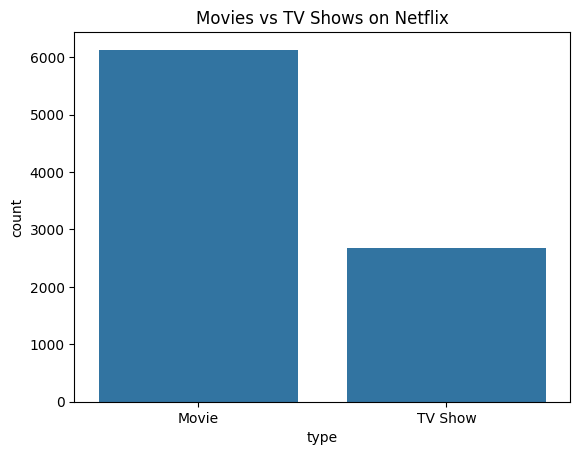

In [13]:
# type column
print(df['type'].value_counts())
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

## Analysis
1. there are more movies on netflix as compared to TV shows - stronger focus on short-term format

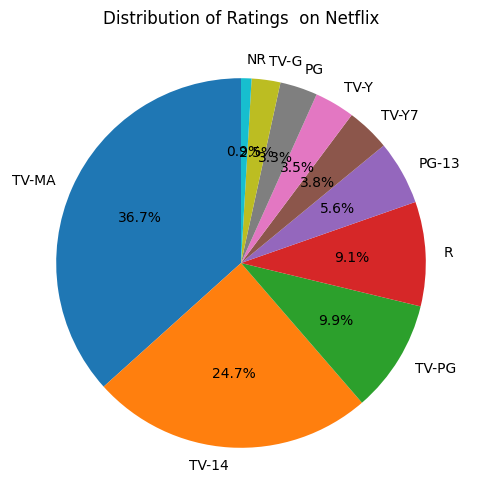

In [14]:
counts = df['rating'].value_counts().head(10)

plt.figure(figsize=(6, 6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Ratings  on Netflix')
plt.show()

1. Mostely shows and movies on netflix are rated as TV_MA(36.7%) and TV_14(24.7%)

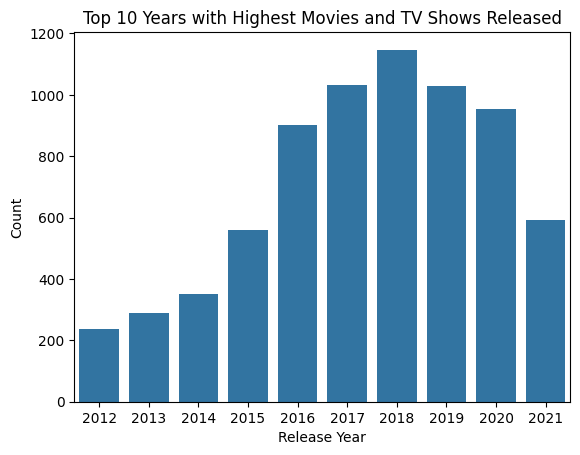

In [15]:
counts = df['release_year'].value_counts().head(10)

sns.barplot(
    x=counts.index,
    y=counts.values
)

plt.title("Top 10 Years with Highest Movies and TV Shows Released")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

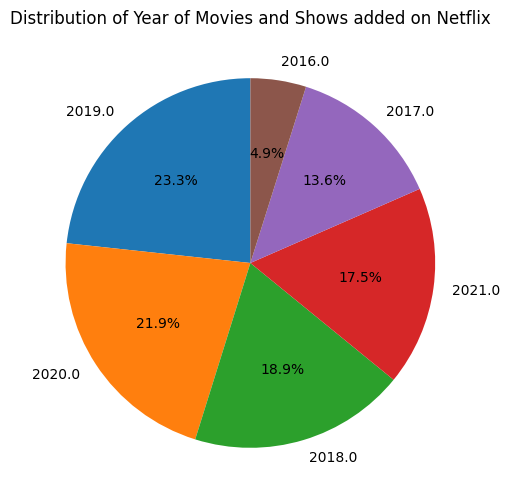

In [16]:
# no of movies and shows added to netflix in each year
counts=df['year_added'].value_counts().head(6)
plt.figure(figsize=(6, 6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Year of Movies and Shows added on Netflix')
plt.show()

1. On Netflix maximum no of movies are added in the year 2019 and from a large no of movies added between the year 2016-2019

In [17]:
# Splited the Listing Column
df['genre_split']=df['listed_in'].str.split(",")
df_exploded = df.explode('genre_split')

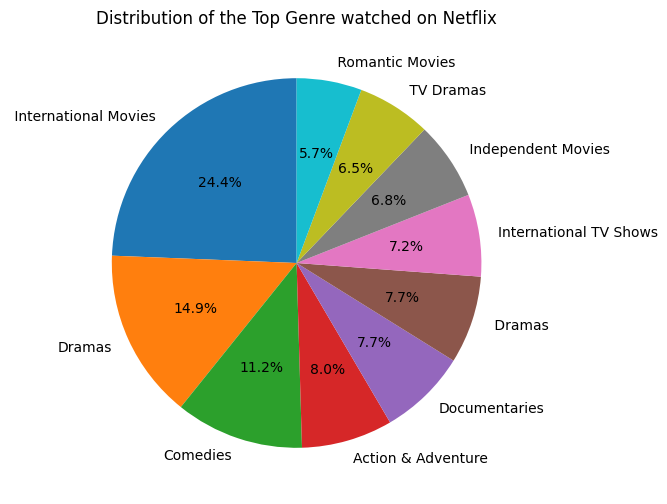

In [18]:
top_genre = df_exploded['genre_split'].value_counts().head(10)
plt.figure(figsize=(6, 6))
plt.pie(
    top_genre.values,
    labels=top_genre.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of the Top Genre watched on Netflix')
plt.show()

# Bivariate Analysis (Relationships)

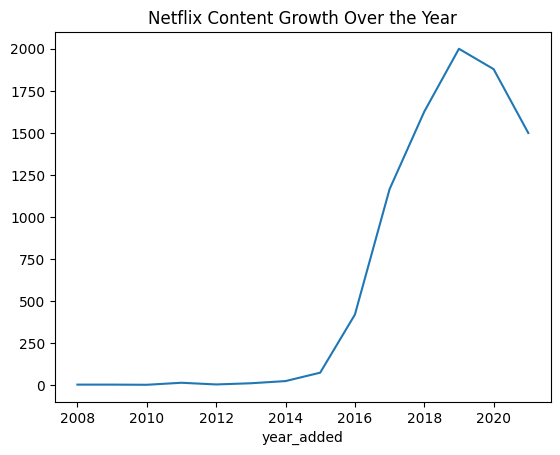

In [19]:
# count growth of shows added per year
df.groupby('year_added')['show_id'].count().plot()
plt.title("Netflix Content Growth Over the Year")
plt.show()

1. 2019 was the peak year where content is added to netflix
2. From the graph we can see that from 2015 onwards netflix started to become active and contact starts to add on it

In [20]:
df['country'].value_counts()
df['Country_Split'] = df['country'].str.split(",")
df_country = df.explode('Country_Split')


1. The most amount of content available on netflix is from USA
2. Around 831 of the content is registered with Unknown Countries
3. There is also 3 countries so we also have to split it for better understanding this will also help us in Feature Engineering

In [21]:
# type vs release_year
df.groupby('release_year')['type'].value_counts()

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    397
2020          Movie      517
              TV Show    436
2021          TV Show    315
              Movie      277
Name: count, Length: 119, dtype: int64

In [22]:
df.groupby('rating')['type'].value_counts()
# convert this into a data frame

rating     type   
66 min     Movie         1
74 min     Movie         1
84 min     Movie         1
G          Movie        41
NC-17      Movie         3
NR         Movie        75
           TV Show       5
Not Rated  Movie         2
           TV Show       2
PG         Movie       287
PG-13      Movie       490
R          Movie       797
           TV Show       2
TV-14      Movie      1427
           TV Show     733
TV-G       Movie       126
           TV Show      94
TV-MA      Movie      2062
           TV Show    1145
TV-PG      Movie       540
           TV Show     323
TV-Y       TV Show     176
           Movie       131
TV-Y7      TV Show     195
           Movie       139
TV-Y7-FV   Movie         5
           TV Show       1
UR         Movie         3
Name: count, dtype: int64